In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('electric_vehicles_spec_2025.csv.csv')
print(df.head())

    brand                model  top_speed_kmh  battery_capacity_kWh  \
0  Abarth     500e Convertible            155                  37.8   
1  Abarth       500e Hatchback            155                  37.8   
2  Abarth  600e Scorpionissima            200                  50.8   
3  Abarth         600e Turismo            200                  50.8   
4  Aiways                   U5            150                  60.0   

  battery_type  number_of_cells  torque_nm  efficiency_wh_per_km  range_km  \
0  Lithium-ion            192.0      235.0                   156       225   
1  Lithium-ion            192.0      235.0                   149       225   
2  Lithium-ion            102.0      345.0                   158       280   
3  Lithium-ion            102.0      345.0                   158       280   
4  Lithium-ion              NaN      310.0                   156       315   

   acceleration_0_100_s  ...  towing_capacity_kg cargo_volume_l  seats  \
0                   7.0  ...  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [9]:
df['cargo_volume_l'] = pd.to_numeric(df['cargo_volume_l'],errors='coerce')
df['towing_capacity_kg'] = df['towing_capacity_kg'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         478 non-null    float64
 13  cargo_volume_l             474 non-null    float64

Which car have the highest top speed?

In [13]:
fastest_cars = df.sort_values(by='top_speed_kmh',ascending=False).head(5)
print('Top 5 Fastest Car')
print(fastest_cars[['brand','model','top_speed_kmh']])

Top 5 Fastest Car
        brand                     model  top_speed_kmh
211  Maserati       GranTurismo Folgore            325
348   Porsche  Taycan Turbo GT Weissach            305
210  Maserati        GranCabrio Folgore            290
347   Porsche           Taycan Turbo GT            290
402     Tesla             Model S Plaid            282


Which 10 cars have the longest range?

In [19]:
longest_range = df.sort_values(by='range_km',ascending=False).head(10)
print('\nTop 10 Car by Range:')
print(longest_range[['brand','model','range_km']])


Top 10 Car by Range:
             brand                            model  range_km
239  Mercedes-Benz                         EQS 450+       685
194          Lucid                Air Grand Touring       665
238  Mercedes-Benz                   EQS 450 4MATIC       655
241  Mercedes-Benz                   EQS 580 4MATIC       640
240  Mercedes-Benz                   EQS 500 4MATIC       640
14            Audi  A6 Sportback e-tron performance       610
15            Audi      A6 Sportback e-tron quattro       590
242  Mercedes-Benz               EQS AMG 53 4MATIC+       585
196          Lucid                      Air Touring       580
11            Audi      A6 Avant e-tron performance       575


Which SUVs offer the largest cargo volume?

In [41]:
suvs_only = df[df['car_body_type'] == 'SUV']
largest_cargo_suvs = suvs_only.sort_values(by='cargo_volume_l',ascending=False).head(5)
print("\nTop 5 SUVs by Cargo Volume:")
print(largest_cargo_suvs[['brand','model','cargo_volume_l']])
    


Top 5 SUVs by Cargo Volume:
        brand                             model  cargo_volume_l
405     Tesla  Model Y Long Range AWD (Juniper)           854.0
406     Tesla  Model Y Long Range RWD (Juniper)           854.0
407     Tesla             Model Y RWD (Juniper)           854.0
165       KGM                        Torres EVX           839.0
80   Cadillac                      Lyriq 600 E4           793.0


Which brand offers the most EV models in 2025?

In [44]:
brand_counts = df['brand'].value_counts().head(5)
print("\nTop Brands by Number of Models:")
print(brand_counts)


Top Brands by Number of Models:
brand
Mercedes-Benz    42
Audi             28
Porsche          26
Volkswagen       23
Ford             22
Name: count, dtype: int64


In [52]:
#Categorize range
def classify_range(r):
    if r <350:
        return 'Short Range(<350km)'
    elif r < 500:
        return 'Medium Range(<350-500km)'
    elif r < 650:
        return 'Long Range(500-650km)'
    else:
        return 'Ultra Long Range(>650km)'

df['range_category'] = df['range_km'].apply(classify_range)
print(df['range_category'].value_counts())

range_category
Medium Range(<350-500km)    252
Short Range(<350km)         156
Long Range(500-650km)        67
Ultra Long Range(>650km)      3
Name: count, dtype: int64


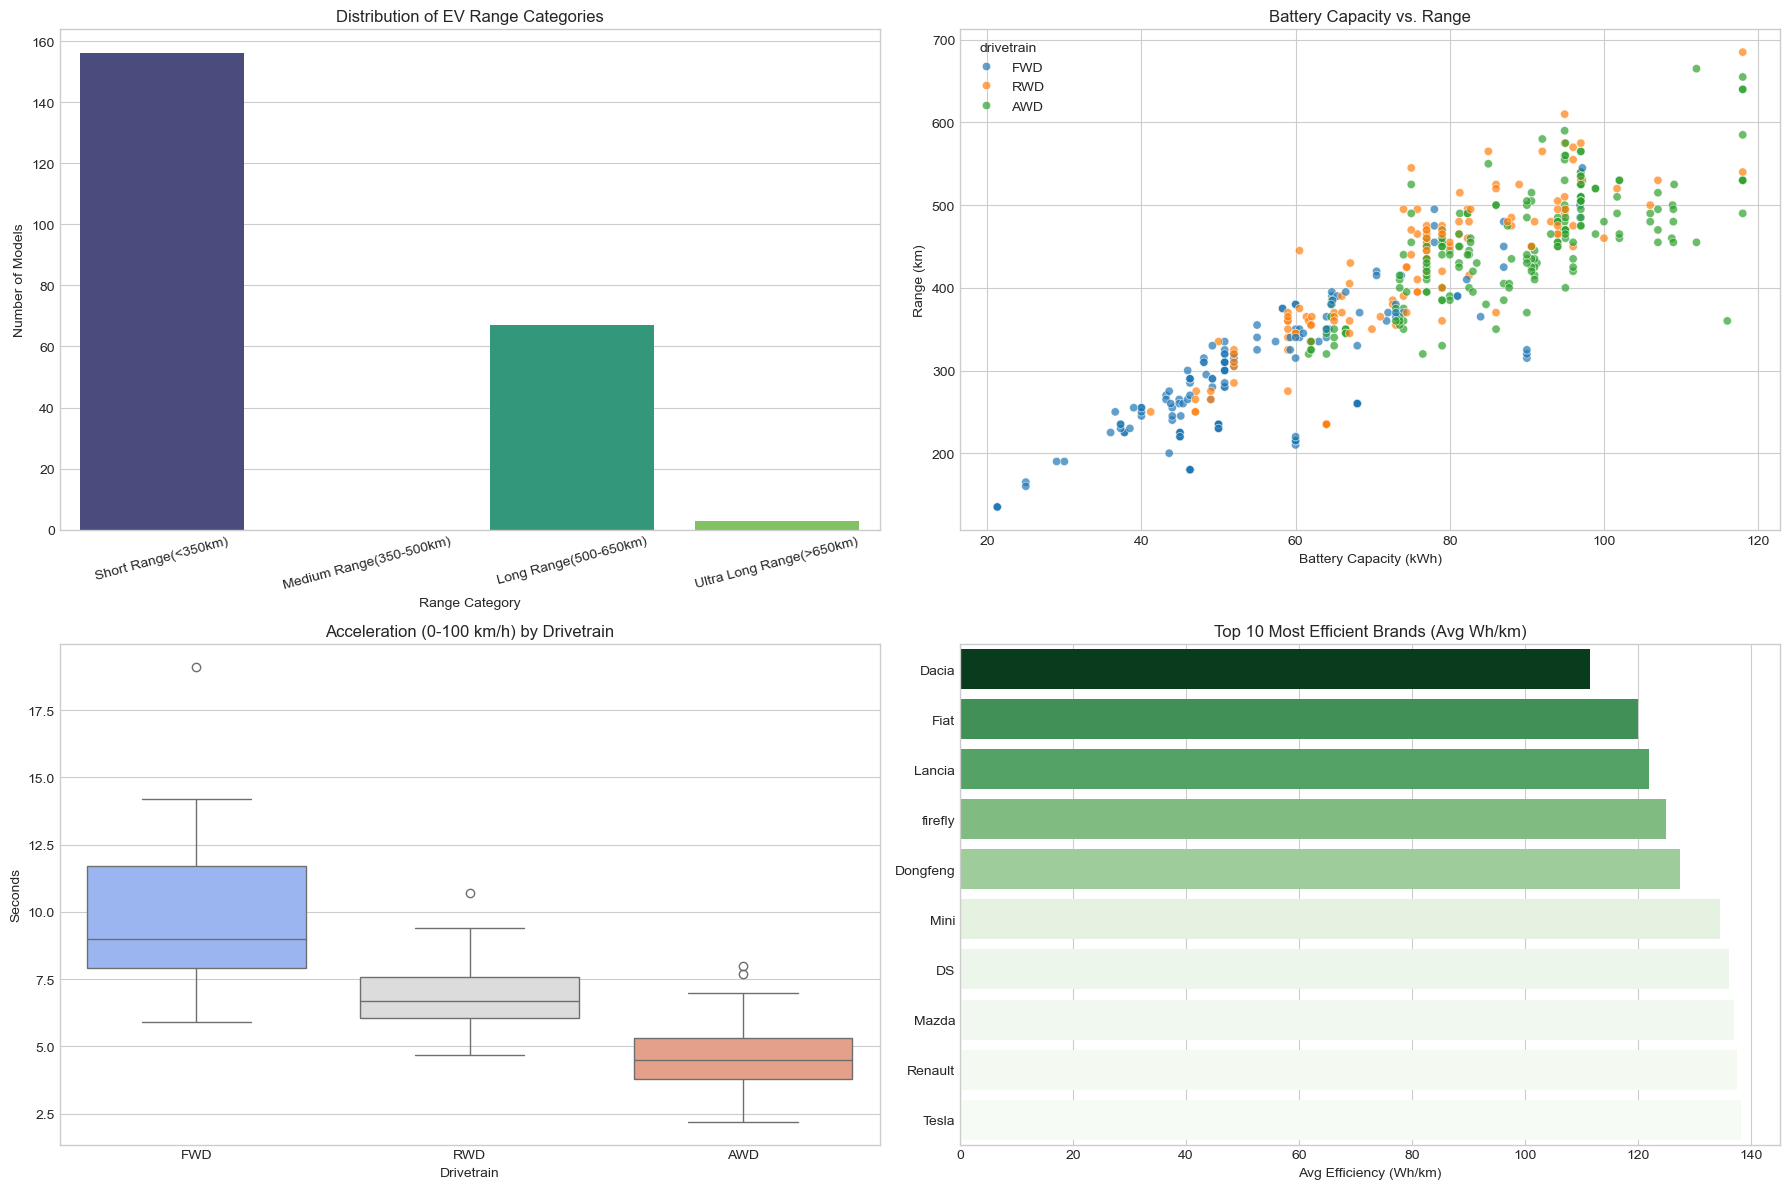

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,12))
plt.style.use('seaborn-v0_8-whitegrid')

#Plot 1:Distribution of Range Categories
plt.subplot(2,2,1)
order = ['Short Range(<350km)','Medium Range(350-500km)','Long Range(500-650km)','Ultra Long Range(>650km)']
sns.countplot(x='range_category', data=df, order=order, palette='viridis', hue='range_category', legend=False)
plt.title('Distribution of EV Range Categories')
plt.xlabel('Range Category')
plt.ylabel('Number of Models')
plt.xticks(rotation=15)

#Plot 2:Battery Capacity vs Range(Efficiency Check)
plt.subplot(2,2,2)
sns.scatterplot(x='battery_capacity_kWh', y='range_km', hue='drivetrain', data=df, alpha=0.7)
plt.title('Battery Capacity vs. Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')

#Plot 3:Acceleration by Deriavation
plt.subplot(2,2,3)
sns.boxplot(x='drivetrain', y='acceleration_0_100_s', data=df, palette='coolwarm', hue='drivetrain', legend=False)
plt.title('Acceleration (0-100 km/h) by Drivetrain')
plt.xlabel('Drivetrain')
plt.ylabel('Seconds')

#Plot 4:Most Efficient Brands
plt.subplot(2,2,4)
avg_efficiency = df.groupby('brand')['efficiency_wh_per_km'].mean().sort_values().head(10).reset_index()
sns.barplot(x='efficiency_wh_per_km', y='brand', data=avg_efficiency, palette='Greens_r', hue='efficiency_wh_per_km', legend=False)
plt.title('Top 10 Most Efficient Brands (Avg Wh/km)')
plt.xlabel('Avg Efficiency (Wh/km)')
plt.ylabel('')

plt.tight_layout()
plt.show()
           

In [75]:
from scipy import stats

#Separate the data into two groups
awd_accel = df[df['drivetrain'] == 'AWD']['acceleration_0_100_s'].dropna()
rwd_accel = df[df['drivetrain'] == 'RWD']['acceleration_0_100_s'].dropna()

#Perform the T-test
t_stat, p_val = stats.ttest_ind(awd_accel,rwd_accel,equal_var=False)

print(f'Mean Acceleration AWD:{awd_accel.mean():.2f}s')
print(f'Mean Acceleration RWD:{rwd_accel.mean():.2f}s')
print(f"P-value:{p_val}")

#Interpret the result
if p_val <0.05:
    print('Result:Statistically Significant! AWD cars are faster.')
else:
    print('Result:Not Significant.')


Mean Acceleration AWD:4.55s
Mean Acceleration RWD:6.89s
P-value:2.62391982568405e-49
Result:Statistically Significant! AWD cars are faster.
